In [1]:
!nvidia-smi

Sat May  8 07:52:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !unzip -q bt.zip
# !pip install scikit-plot scipy==1.2.0

replace bt/data.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace bt/data.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [4]:
import os
import time
import torch
import pickle
import numpy as np
import pandas as pd
from bt.data import *
import torch.nn as nn
from bt.models import *
from bt.utils import *
from torchvision import transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold, train_test_split
from torchvision.models import inception_v3, resnet50, vgg16, vgg16_bn

In [5]:
batch_size = 32

n_classes = 3

epochs = 1

lr = 3e-4

num_workers = 4

image_size = (224, 224)

class_names = ['Glioma', 'Meningioma', 'Pituitary']

images_dir = 'data/'
model_dir = 'models/'

os.makedirs(model_dir, exist_ok=True)

df = pd.DataFrame(columns=['model', 'accuracy', 'loss', 'precision_class_wise', 'precision_avg', 'recall_class_wise', 'recall_avg', 'f1_class_wise', 'f1_avg'])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

In [6]:
dataset = ImageFolder(root=images_dir)

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=101) 

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.100172  Accuracy: 28.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.179577  Accuracy: 33.333333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.107177  Accuracy: 29.375000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.095331  Accuracy: 34.375000%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.102552  Accuracy: 34.027778%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.032633  Accuracy: 36.931818%
Epoch:  1  batch:     13 [    13/77]  Loss: 0.930326  Accuracy: 39.423077%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.139960  Accuracy: 40.625000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.093471  Accuracy: 41.176471%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.084691  Accuracy: 42.434211%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.077998  Accuracy: 43.154762%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.077950  Accuracy: 43.750000%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.061717  Accuracy: 44.37500

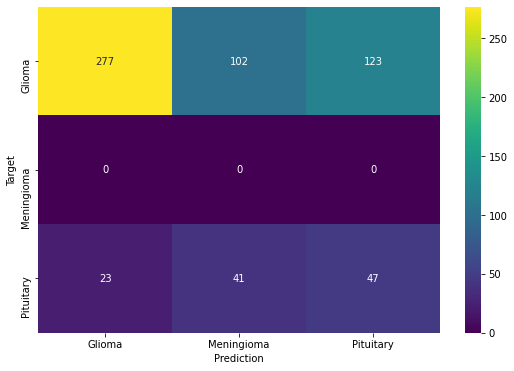


Accuracy Score: 0.5285

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.92      0.55      0.69       502
         1.0       0.00      0.00      0.00         0
         2.0       0.28      0.42      0.33       111

    accuracy                           0.53       613
   macro avg       0.40      0.33      0.34       613
weighted avg       0.81      0.53      0.63       613


Precision Score (Class-Wise): 
[0.92333333 0.         0.27647059]
Average Precision Score: 0.3999346405228758

Recall Score (Class-Wise): 
[0.55179283 0.         0.42342342]
Average Recall Score: 0.32507208403622745

F1 Score (Class-Wise): 
[0.69077307 0.         0.33451957]
Average F1: 0.34176421342846913

Finished Training

Training Duration 17.61 minutes
GPU memory used : 2159909376 kb
GPU memory cached : 4137680896 kb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


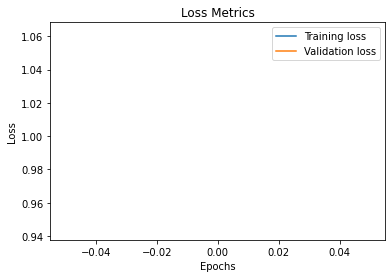

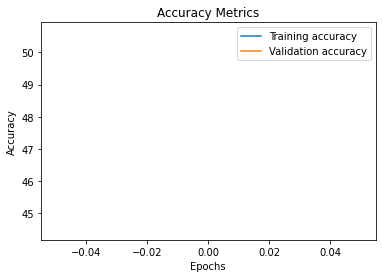

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.135225  Accuracy: 21.875000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.096975  Accuracy: 36.458333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.100690  Accuracy: 32.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.087041  Accuracy: 32.142857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.119208  Accuracy: 31.250000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.102427  Accuracy: 30.965909%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.097455  Accuracy: 31.009615%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.096211  Accuracy: 32.500000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.085917  Accuracy: 34.191176%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.925975  Accuracy: 36.348684%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.051508  Accuracy: 37.797619%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.092673  Accuracy: 37.771739%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.089762  Accuracy: 38.75000

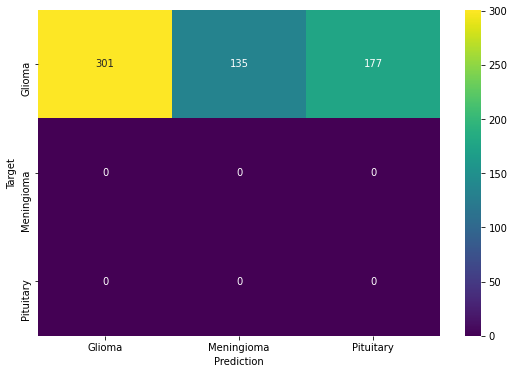


Accuracy Score: 0.4910

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49       613
   macro avg       0.33      0.16      0.22       613
weighted avg       1.00      0.49      0.66       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.49102773 0.         0.        ]
Average Recall Score: 0.16367591082109842

F1 Score (Class-Wise): 
[0.65864333 0.         0.        ]
Average F1: 0.21954777534646244

Finished Training

Training Duration 0.71 minutes
GPU memory used : 2156894720 kb
GPU memory cached : 4137680896 kb


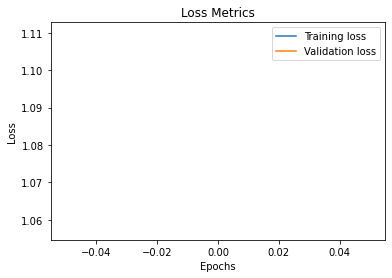

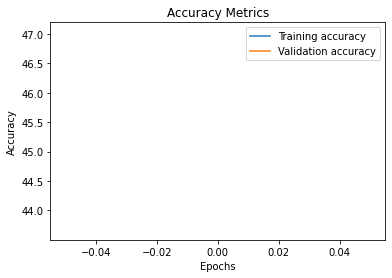

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.109907  Accuracy: 25.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.092947  Accuracy: 36.458333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.103263  Accuracy: 31.250000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.092045  Accuracy: 35.267857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.103878  Accuracy: 37.500000%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.011416  Accuracy: 40.625000%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.122753  Accuracy: 39.663462%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.090462  Accuracy: 40.000000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.095219  Accuracy: 40.808824%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.096938  Accuracy: 40.625000%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.097309  Accuracy: 41.071429%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.093924  Accuracy: 41.032609%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.098033  Accuracy: 41.25000

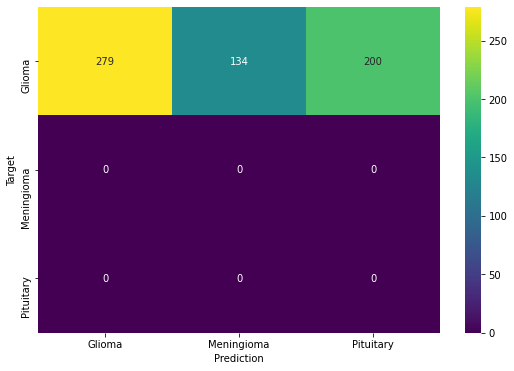


Accuracy Score: 0.4551

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.46       613
   macro avg       0.33      0.15      0.21       613
weighted avg       1.00      0.46      0.63       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45513866 0.         0.        ]
Average Recall Score: 0.15171288743882547

F1 Score (Class-Wise): 
[0.62556054 0.         0.        ]
Average F1: 0.20852017937219733

Finished Training

Training Duration 0.71 minutes
GPU memory used : 2157812224 kb
GPU memory cached : 4137680896 kb


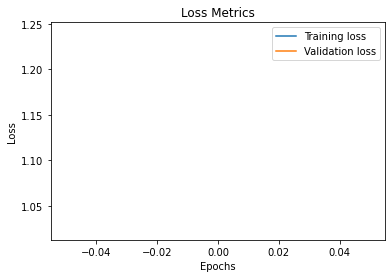

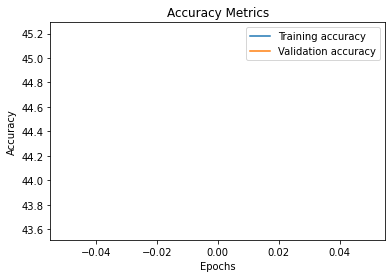

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.099901  Accuracy: 40.625000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.132788  Accuracy: 35.416667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.115723  Accuracy: 30.625000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.095285  Accuracy: 33.928571%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.102226  Accuracy: 35.069444%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.091119  Accuracy: 36.079545%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.074990  Accuracy: 37.500000%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.149178  Accuracy: 39.375000%
Epoch:  1  batch:     17 [    17/77]  Loss: 0.994299  Accuracy: 42.095588%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.117411  Accuracy: 41.940789%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.113668  Accuracy: 41.071429%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.076213  Accuracy: 41.440217%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.065929  Accuracy: 42.37500

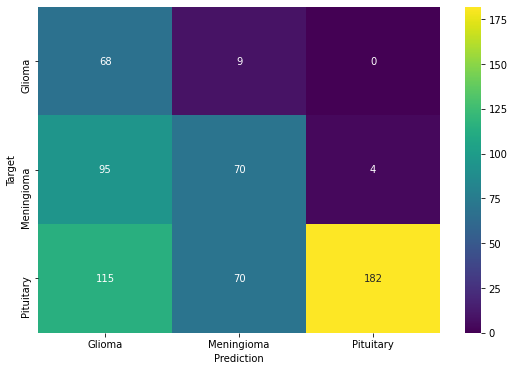


Accuracy Score: 0.5220

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.24      0.88      0.38        77
         1.0       0.47      0.41      0.44       169
         2.0       0.98      0.50      0.66       367

    accuracy                           0.52       613
   macro avg       0.56      0.60      0.49       613
weighted avg       0.75      0.52      0.56       613


Precision Score (Class-Wise): 
[0.24460432 0.46979866 0.97849462]
Average Precision Score: 0.5642991993069325

Recall Score (Class-Wise): 
[0.88311688 0.41420118 0.49591281]
Average Recall Score: 0.5977436243627817

F1 Score (Class-Wise): 
[0.38309859 0.44025157 0.65822785]
Average F1: 0.4938593373258686

Finished Training

Training Duration 0.71 minutes
GPU memory used : 2157484544 kb
GPU memory cached : 4137680896 kb


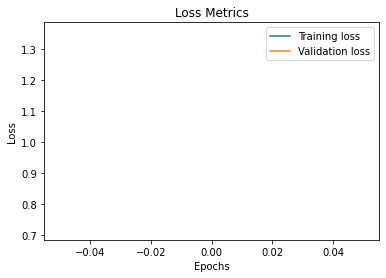

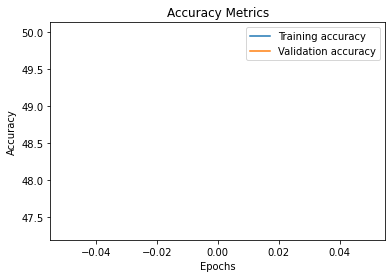

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.112653  Accuracy: 25.000000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.210240  Accuracy: 32.291667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.107536  Accuracy: 26.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.099115  Accuracy: 24.553571%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.076383  Accuracy: 31.944444%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.095267  Accuracy: 33.806818%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.097435  Accuracy: 35.096154%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.074719  Accuracy: 36.666667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.065482  Accuracy: 37.500000%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.028757  Accuracy: 38.486842%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.021039  Accuracy: 39.434524%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.064355  Accuracy: 39.673913%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.009251  Accuracy: 41.12500

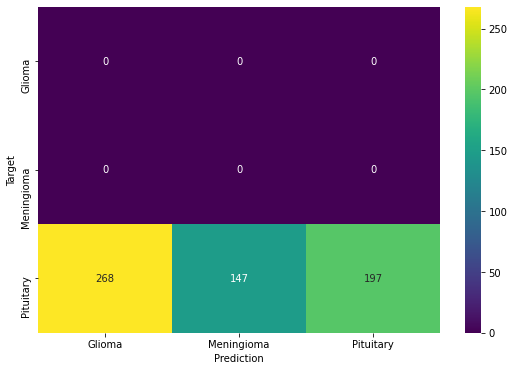


Accuracy Score: 0.3219

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.32      0.49       612

    accuracy                           0.32       612
   macro avg       0.33      0.11      0.16       612
weighted avg       1.00      0.32      0.49       612


Precision Score (Class-Wise): 
[0. 0. 1.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.         0.         0.32189542]
Average Recall Score: 0.10729847494553378

F1 Score (Class-Wise): 
[0.         0.         0.48702101]
Average F1: 0.1623403378656778

Finished Training

Training Duration 0.72 minutes
GPU memory used : 2160237056 kb
GPU memory cached : 4137680896 kb


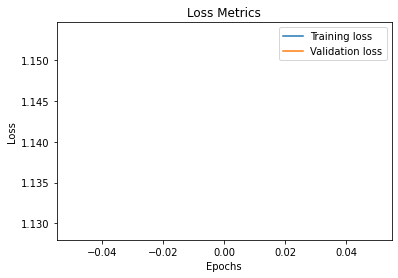

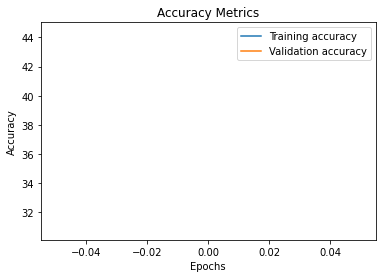

In [8]:
for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'vgg16_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = vgg16()

    model.classifier[6] = nn.Linear(4096, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('vgg16_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.101403  Accuracy: 40.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.997568  Accuracy: 44.906656%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.029860  Accuracy: 45.083469%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.046859  Accuracy: 46.066576%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.038529  Accuracy: 45.865620%
Epoch 1 | Training Accuracy: 45.865620% | Training Loss: 1.038529
Test accuracy: 48.701298% | Test Loss: 1.155088
Test accuracy (wo augmentation): 48.701298% | Test Loss: 1.155160
Test Metrics: 



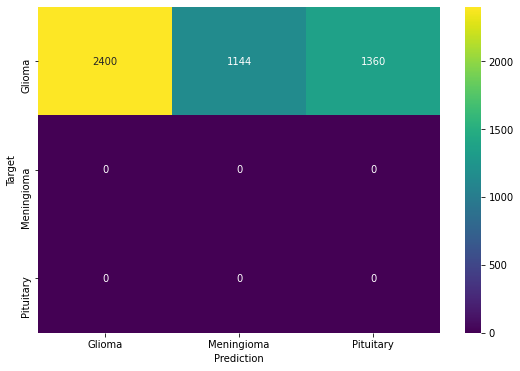

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy Score: 0.4894

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66      4904
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49      4904
   macro avg       0.33      0.16      0.22      4904
weighted avg       1.00      0.49      0.66      4904


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.48939641 0.         0.        ]
Average Recall Score: 0.1631321370309951

F1 Score (Class-Wise): 
[0.65717415 0.         0.        ]
Average F1: 0.21905805038335158



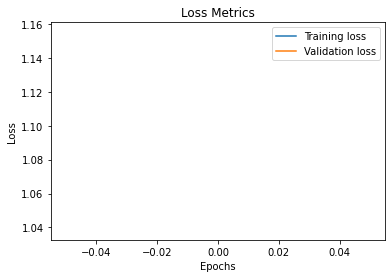

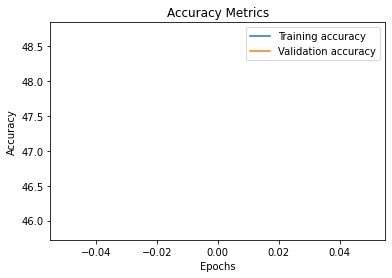

Test Metrics (wo augmentation): 



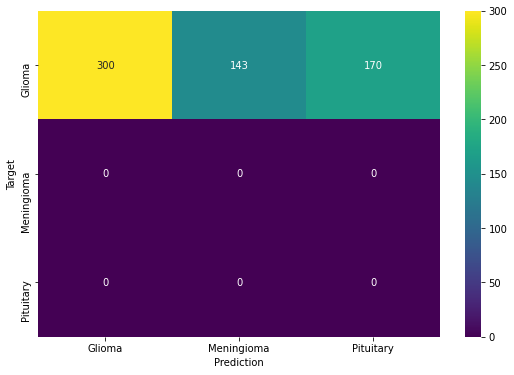


Accuracy Score: 0.4894

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49       613
   macro avg       0.33      0.16      0.22       613
weighted avg       1.00      0.49      0.66       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.48939641 0.         0.        ]
Average Recall Score: 0.1631321370309951

F1 Score (Class-Wise): 
[0.65717415 0.         0.        ]
Average F1: 0.21905805038335158



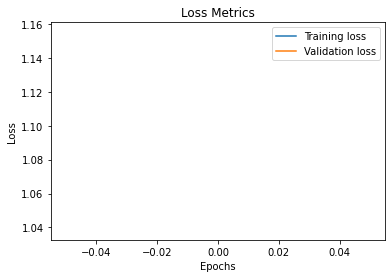

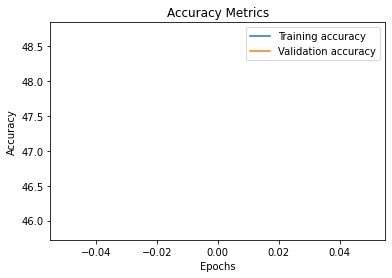

Finished Training

Training Duration 5.93 minutes
GPU memory used : 2175179264 kb
GPU memory cached : 7038042112 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.105030  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.932190  Accuracy: 44.094968%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.231729  Accuracy: 45.409202%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.012633  Accuracy: 45.523098%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.053958  Accuracy: 45.661705%
Epoch 1 | Training Accuracy: 45.661705% | Training Loss: 1.053958
Test accuracy: 48.863636% | Test Loss: 1.178272
Test accuracy (wo augmentation): 48.863636% | Test Loss: 0.791566
Test Metrics: 



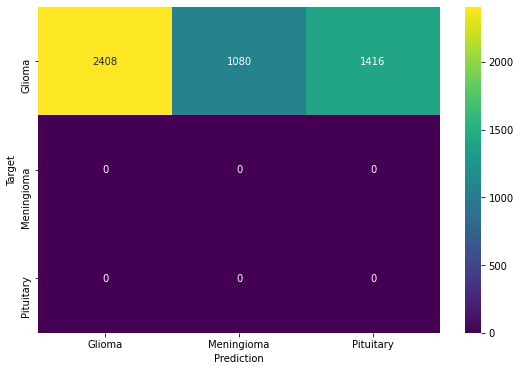


Accuracy Score: 0.4910

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66      4904
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49      4904
   macro avg       0.33      0.16      0.22      4904
weighted avg       1.00      0.49      0.66      4904


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.49102773 0.         0.        ]
Average Recall Score: 0.16367591082109842

F1 Score (Class-Wise): 
[0.65864333 0.         0.        ]
Average F1: 0.21954777534646244



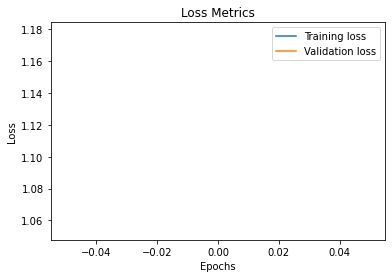

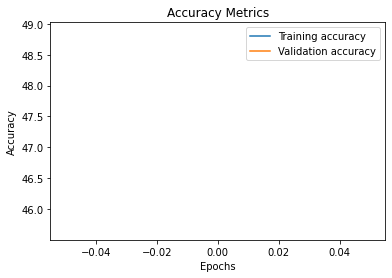

Test Metrics (wo augmentation): 



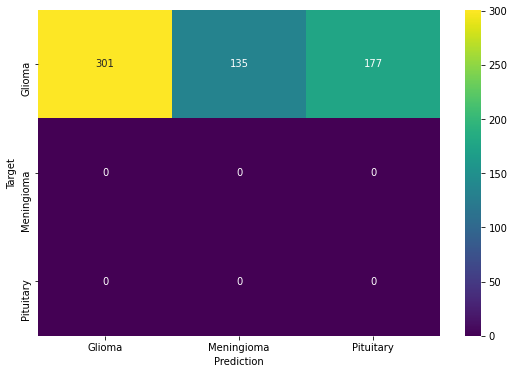


Accuracy Score: 0.4910

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.49      0.66       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.49       613
   macro avg       0.33      0.16      0.22       613
weighted avg       1.00      0.49      0.66       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.49102773 0.         0.        ]
Average Recall Score: 0.16367591082109842

F1 Score (Class-Wise): 
[0.65864333 0.         0.        ]
Average F1: 0.21954777534646244



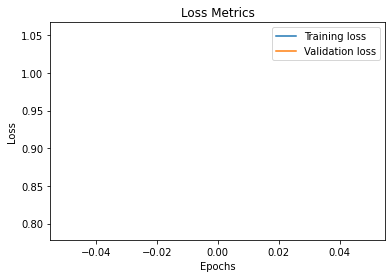

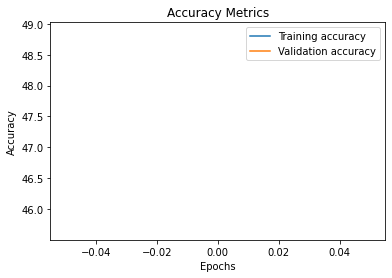

Finished Training

Training Duration 5.92 minutes
GPU memory used : 2173737472 kb
GPU memory cached : 7038042112 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.123378  Accuracy: 21.875000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.999854  Accuracy: 46.935877%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.953810  Accuracy: 46.925896%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.125903  Accuracy: 47.024457%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.942562  Accuracy: 46.829119%
Epoch 1 | Training Accuracy: 46.829121% | Training Loss: 0.942562
Test accuracy: 45.292210% | Test Loss: 0.752743
Test accuracy (wo augmentation): 45.292210% | Test Loss: 0.754200
Test Metrics: 



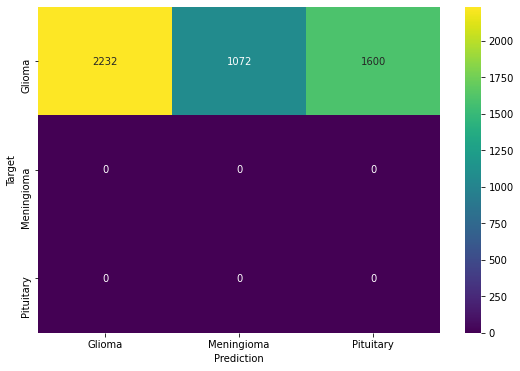


Accuracy Score: 0.4551

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63      4904
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.46      4904
   macro avg       0.33      0.15      0.21      4904
weighted avg       1.00      0.46      0.63      4904


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45513866 0.         0.        ]
Average Recall Score: 0.15171288743882547

F1 Score (Class-Wise): 
[0.62556054 0.         0.        ]
Average F1: 0.20852017937219733



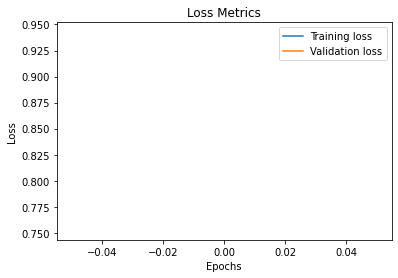

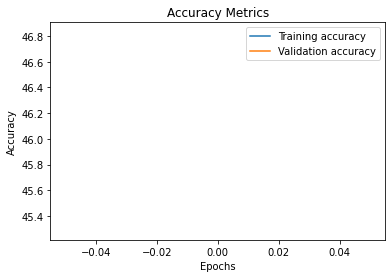

Test Metrics (wo augmentation): 



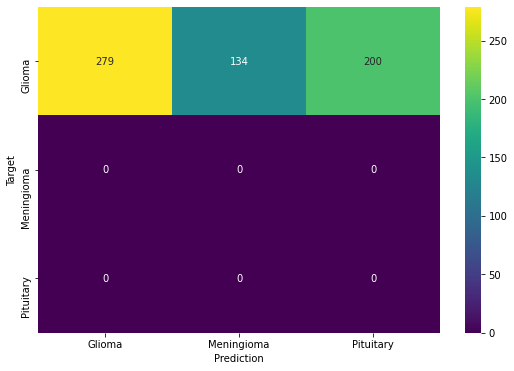


Accuracy Score: 0.4551

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.46       613
   macro avg       0.33      0.15      0.21       613
weighted avg       1.00      0.46      0.63       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45513866 0.         0.        ]
Average Recall Score: 0.15171288743882547

F1 Score (Class-Wise): 
[0.62556054 0.         0.        ]
Average F1: 0.20852017937219733



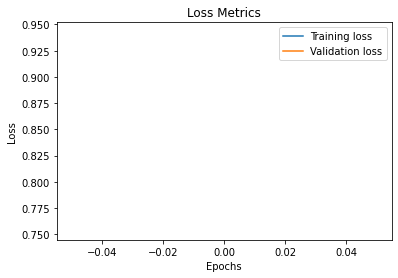

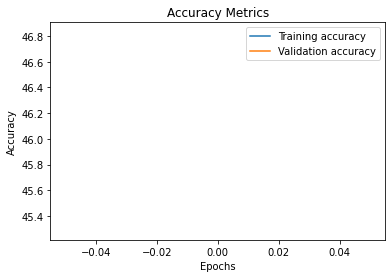

Finished Training

Training Duration 5.93 minutes
GPU memory used : 2173213184 kb
GPU memory cached : 7038042112 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.134299  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.940574  Accuracy: 44.094968%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.126920  Accuracy: 45.460098%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.037105  Accuracy: 46.283967%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.229444  Accuracy: 46.232667%
Epoch 1 | Training Accuracy: 46.232666% | Training Loss: 1.229444
Test accuracy: 45.129871% | Test Loss: 0.847446
Test accuracy (wo augmentation): 45.129871% | Test Loss: 0.846476
Test Metrics: 



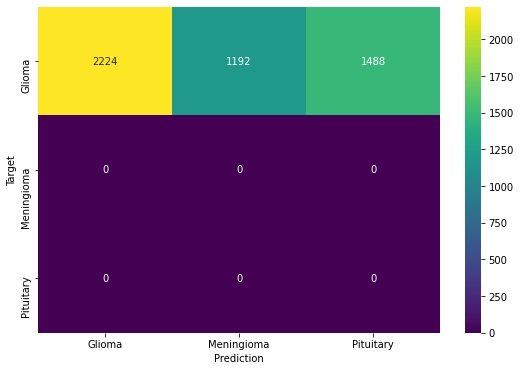


Accuracy Score: 0.4535

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62      4904
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.45      4904
   macro avg       0.33      0.15      0.21      4904
weighted avg       1.00      0.45      0.62      4904


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45350734 0.         0.        ]
Average Recall Score: 0.15116911364872213

F1 Score (Class-Wise): 
[0.62401796 0.         0.        ]
Average F1: 0.20800598578376353



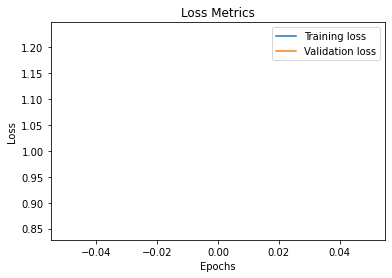

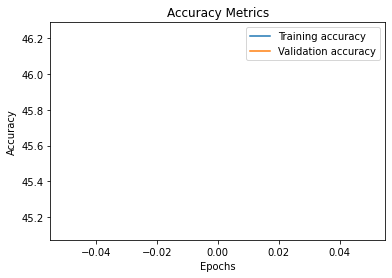

Test Metrics (wo augmentation): 



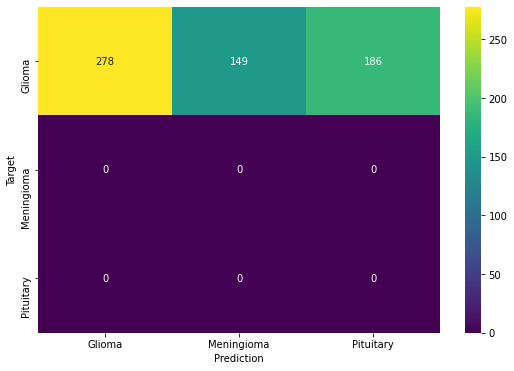


Accuracy Score: 0.4535

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.45       613
   macro avg       0.33      0.15      0.21       613
weighted avg       1.00      0.45      0.62       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45350734 0.         0.        ]
Average Recall Score: 0.15116911364872213

F1 Score (Class-Wise): 
[0.62401796 0.         0.        ]
Average F1: 0.20800598578376353



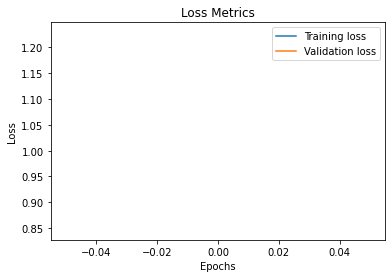

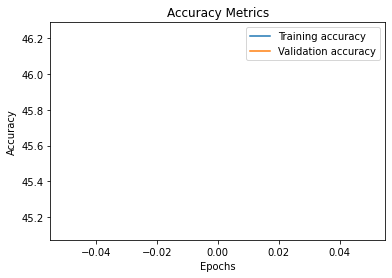

Finished Training

Training Duration 5.93 minutes
GPU memory used : 2170853888 kb
GPU memory cached : 7038042112 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.110794  Accuracy: 28.125000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.919698  Accuracy: 45.089286%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.001023  Accuracy: 45.582248%
Epoch:  1  batch:    460 [   460/613]  Loss: 1.171238  Accuracy: 47.540761%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.055419  Accuracy: 46.890294%
Epoch 1 | Training Accuracy: 46.890293% | Training Loss: 1.055419
Test accuracy: 43.790848% | Test Loss: 0.958195
Test accuracy (wo augmentation): 43.790848% | Test Loss: 1.155367
Test Metrics: 



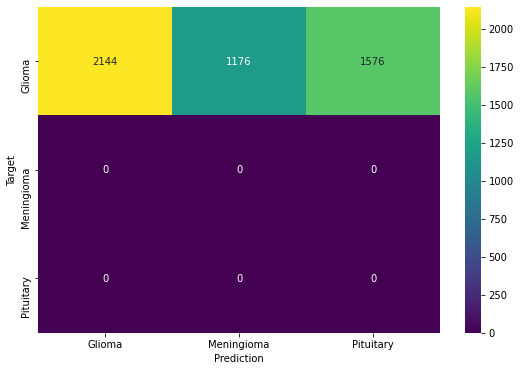


Accuracy Score: 0.4379

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61      4896
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.44      4896
   macro avg       0.33      0.15      0.20      4896
weighted avg       1.00      0.44      0.61      4896


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.4379085 0.        0.       ]
Average Recall Score: 0.14596949891067537

F1 Score (Class-Wise): 
[0.60909091 0.         0.        ]
Average F1: 0.20303030303030303



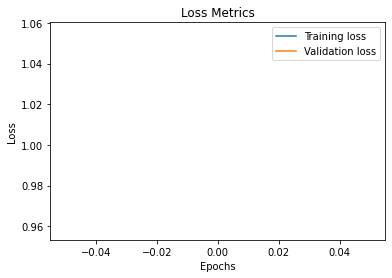

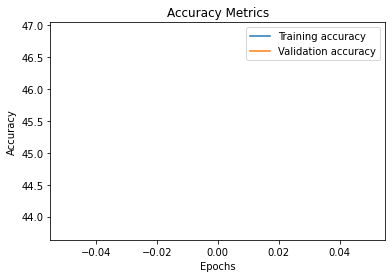

Test Metrics (wo augmentation): 



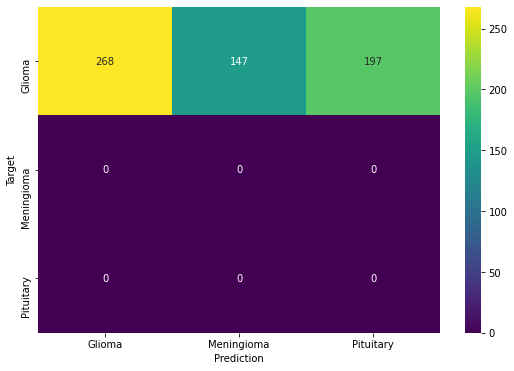


Accuracy Score: 0.4379

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61       612
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.44       612
   macro avg       0.33      0.15      0.20       612
weighted avg       1.00      0.44      0.61       612


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.4379085 0.        0.       ]
Average Recall Score: 0.14596949891067537

F1 Score (Class-Wise): 
[0.60909091 0.         0.        ]
Average F1: 0.20303030303030303



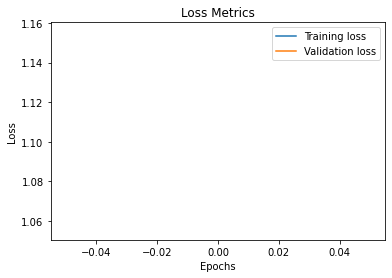

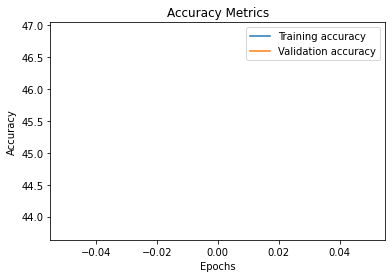

Finished Training

Training Duration 5.97 minutes
GPU memory used : 2176031232 kb
GPU memory cached : 7038042112 kb



In [10]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'vgg16_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = vgg16()

    model.classifier[6] = nn.Linear(4096, 3)
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('vgg16_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.122924  Accuracy: 31.250000%
Epoch:  1  batch:      3 [     3/77]  Loss: 3.848999  Accuracy: 31.250000%
Epoch:  1  batch:      5 [     5/77]  Loss: 0.983388  Accuracy: 36.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.331253  Accuracy: 41.964286%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.731835  Accuracy: 39.583333%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.138419  Accuracy: 38.352273%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.216963  Accuracy: 37.019231%
Epoch:  1  batch:     15 [    15/77]  Loss: 0.957144  Accuracy: 37.500000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.071705  Accuracy: 38.235294%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.056307  Accuracy: 40.131579%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.093332  Accuracy: 41.071429%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.096184  Accuracy: 41.168478%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.037391  Accuracy: 41.87500

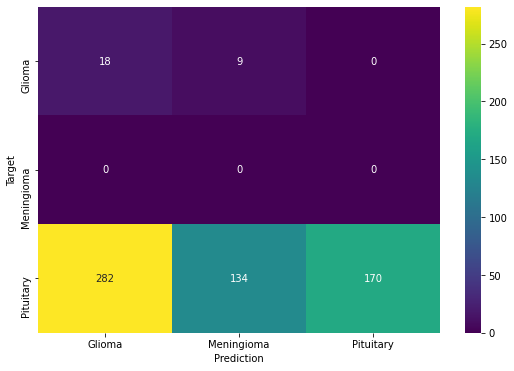


Accuracy Score: 0.3067

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.06      0.67      0.11        27
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.29      0.45       586

    accuracy                           0.31       613
   macro avg       0.35      0.32      0.19       613
weighted avg       0.96      0.31      0.43       613


Precision Score (Class-Wise): 
[0.06 0.   1.  ]
Average Precision Score: 0.35333333333333333

Recall Score (Class-Wise): 
[0.66666667 0.         0.29010239]
Average Recall Score: 0.3189230185817216

F1 Score (Class-Wise): 
[0.11009174 0.         0.44973545]
Average F1: 0.18660906428490523

Finished Training

Training Duration 0.65 minutes
GPU memory used : 1977563648 kb
GPU memory cached : 7038042112 kb


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


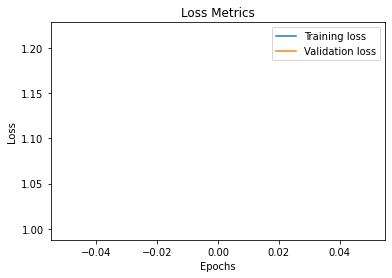

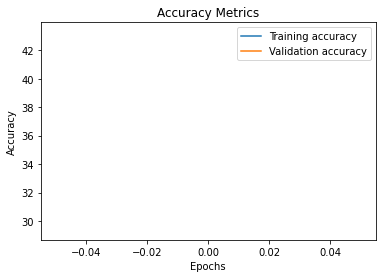

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.066472  Accuracy: 40.625000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.006157  Accuracy: 54.166667%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.459827  Accuracy: 41.875000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.736867  Accuracy: 41.964286%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.328621  Accuracy: 42.013889%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.319019  Accuracy: 37.784091%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.652191  Accuracy: 38.221154%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.286346  Accuracy: 39.583333%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.290860  Accuracy: 38.602941%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.187009  Accuracy: 38.815789%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.097957  Accuracy: 37.946429%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.096231  Accuracy: 38.451087%
Epoch:  1  batch:     25 [    25/77]  Loss: 0.901333  Accuracy: 39.50000

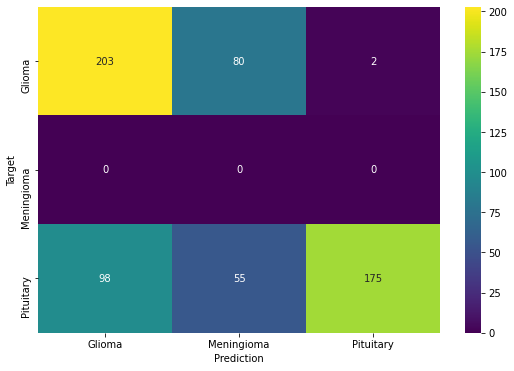


Accuracy Score: 0.6166

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.67      0.71      0.69       285
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.53      0.69       328

    accuracy                           0.62       613
   macro avg       0.55      0.42      0.46       613
weighted avg       0.84      0.62      0.69       613


Precision Score (Class-Wise): 
[0.6744186  0.         0.98870056]
Average Precision Score: 0.5543730565409714

Recall Score (Class-Wise): 
[0.7122807  0.         0.53353659]
Average Recall Score: 0.41527242904007994

F1 Score (Class-Wise): 
[0.69283276 0.         0.69306931]
Average F1: 0.4619673571452709

Finished Training

Training Duration 0.65 minutes
GPU memory used : 1976646144 kb
GPU memory cached : 7038042112 kb


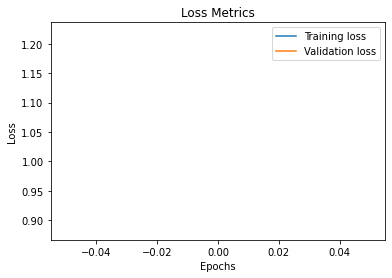

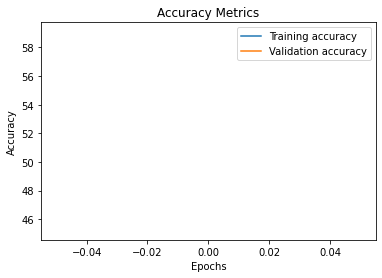

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.114218  Accuracy: 34.375000%
Epoch:  1  batch:      3 [     3/77]  Loss: 1.071275  Accuracy: 46.875000%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.506360  Accuracy: 36.250000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.133851  Accuracy: 39.285714%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.112718  Accuracy: 42.013889%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.274825  Accuracy: 42.329545%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.068264  Accuracy: 42.788462%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.045380  Accuracy: 42.708333%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.027348  Accuracy: 43.750000%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.252406  Accuracy: 42.927632%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.267547  Accuracy: 42.410714%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.984680  Accuracy: 42.391304%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.069042  Accuracy: 41.87500

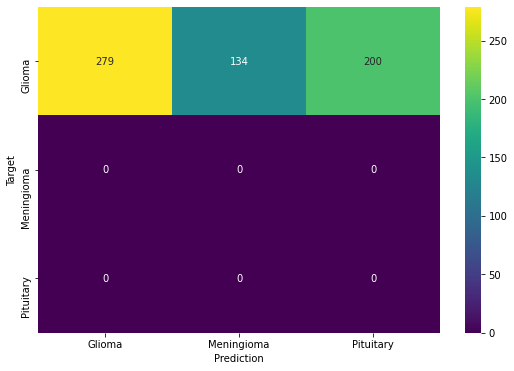


Accuracy Score: 0.4551

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63       613
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.46       613
   macro avg       0.33      0.15      0.21       613
weighted avg       1.00      0.46      0.63       613


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.45513866 0.         0.        ]
Average Recall Score: 0.15171288743882547

F1 Score (Class-Wise): 
[0.62556054 0.         0.        ]
Average F1: 0.20852017937219733

Finished Training

Training Duration 0.65 minutes
GPU memory used : 1976515072 kb
GPU memory cached : 7038042112 kb


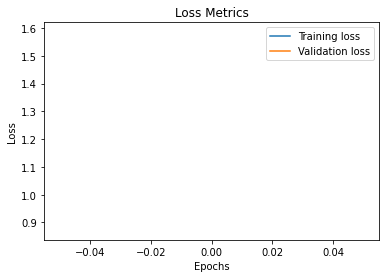

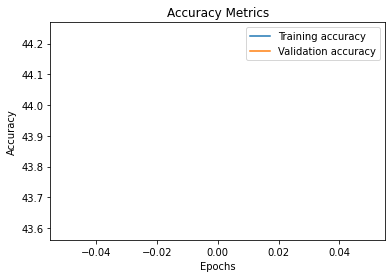

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.108858  Accuracy: 15.625000%
Epoch:  1  batch:      3 [     3/77]  Loss: 2.659914  Accuracy: 36.458333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.665465  Accuracy: 42.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 1.426667  Accuracy: 41.517857%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.555310  Accuracy: 44.444444%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.329926  Accuracy: 41.761364%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.411021  Accuracy: 39.903846%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.491532  Accuracy: 39.791667%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.248919  Accuracy: 40.625000%
Epoch:  1  batch:     19 [    19/77]  Loss: 1.220177  Accuracy: 39.144737%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.060364  Accuracy: 38.690476%
Epoch:  1  batch:     23 [    23/77]  Loss: 0.999339  Accuracy: 39.130435%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.328194  Accuracy: 39.25000

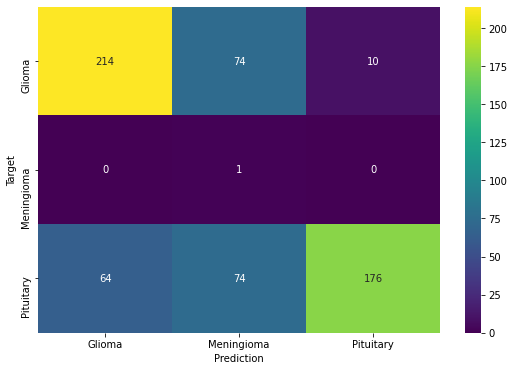


Accuracy Score: 0.6378

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       298
         1.0       0.01      1.00      0.01         1
         2.0       0.95      0.56      0.70       314

    accuracy                           0.64       613
   macro avg       0.57      0.76      0.49       613
weighted avg       0.86      0.64      0.72       613


Precision Score (Class-Wise): 
[0.76978417 0.00671141 0.94623656]
Average Precision Score: 0.5742440470658762

Recall Score (Class-Wise): 
[0.71812081 1.         0.56050955]
Average Recall Score: 0.7595434531697517

F1 Score (Class-Wise): 
[0.74305556 0.01333333 0.704     ]
Average F1: 0.48679629629629634

Finished Training

Training Duration 0.66 minutes
GPU memory used : 1977891328 kb
GPU memory cached : 7038042112 kb


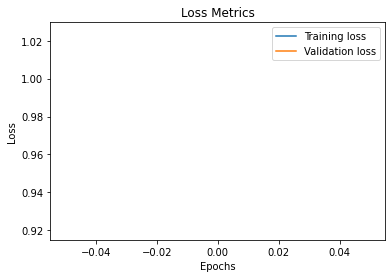

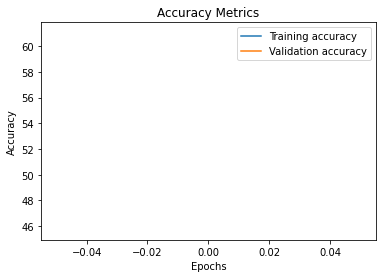

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/77]  Loss: 1.110132  Accuracy: 28.125000%
Epoch:  1  batch:      3 [     3/77]  Loss: 3.073190  Accuracy: 33.333333%
Epoch:  1  batch:      5 [     5/77]  Loss: 1.485561  Accuracy: 32.500000%
Epoch:  1  batch:      7 [     7/77]  Loss: 2.140873  Accuracy: 34.375000%
Epoch:  1  batch:      9 [     9/77]  Loss: 1.179689  Accuracy: 34.722222%
Epoch:  1  batch:     11 [    11/77]  Loss: 1.442934  Accuracy: 36.647727%
Epoch:  1  batch:     13 [    13/77]  Loss: 1.284497  Accuracy: 36.057692%
Epoch:  1  batch:     15 [    15/77]  Loss: 1.132195  Accuracy: 37.500000%
Epoch:  1  batch:     17 [    17/77]  Loss: 1.206671  Accuracy: 37.683824%
Epoch:  1  batch:     19 [    19/77]  Loss: 0.904804  Accuracy: 39.967105%
Epoch:  1  batch:     21 [    21/77]  Loss: 1.086843  Accuracy: 41.369048%
Epoch:  1  batch:     23 [    23/77]  Loss: 1.225698  Accuracy: 40.625000%
Epoch:  1  batch:     25 [    25/77]  Loss: 1.107886  Accuracy: 41.25000

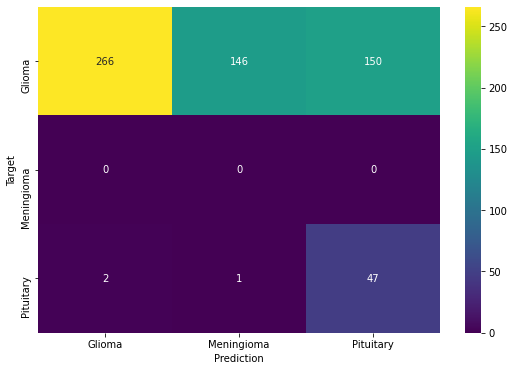


Accuracy Score: 0.5114

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.47      0.64       562
         1.0       0.00      0.00      0.00         0
         2.0       0.24      0.94      0.38        50

    accuracy                           0.51       612
   macro avg       0.41      0.47      0.34       612
weighted avg       0.93      0.51      0.62       612


Precision Score (Class-Wise): 
[0.99253731 0.         0.23857868]
Average Precision Score: 0.41037199787862716

Recall Score (Class-Wise): 
[0.47330961 0.         0.94      ]
Average Recall Score: 0.47110320284697504

F1 Score (Class-Wise): 
[0.64096386 0.         0.3805668 ]
Average F1: 0.34051021901370665

Finished Training

Training Duration 0.65 minutes
GPU memory used : 1976515072 kb
GPU memory cached : 7038042112 kb


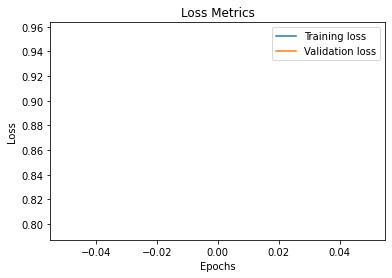

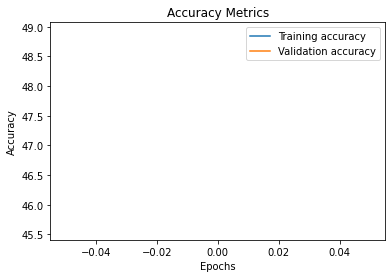

In [11]:
batch_size = 32

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'vgg16_frozen_wo_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=plain_transform)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = vgg16()
    
    for params in model.parameters():
        params.requires_grad = False

    model.classifier[6] = nn.Linear(4096, 3)
    
    for params in model.classifier.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb".format(torch.cuda.memory_reserved()))

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr) 

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('vgg16_test_results.csv', index=False)

FOLD 1


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.093513  Accuracy: 40.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.895096  Accuracy: 43.628247%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.282189  Accuracy: 49.623371%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.636068  Accuracy: 52.146739%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.977780  Accuracy: 54.098695%
Epoch 1 | Training Accuracy: 54.098694% | Training Loss: 0.977780
Test accuracy: 66.193184% | Test Loss: 1.057413
Test accuracy (wo augmentation): 30.681818% | Test Loss: 0.551187
Test Metrics: 



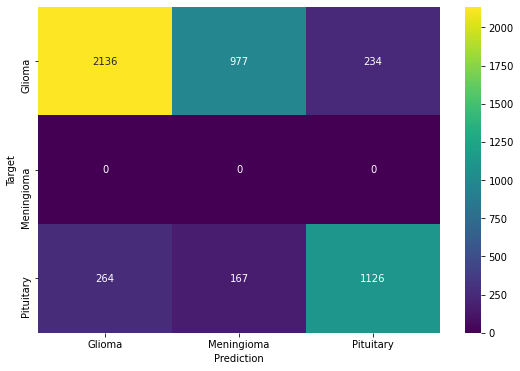


Accuracy Score: 0.6652

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.89      0.64      0.74      3347
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.72      0.77      1557

    accuracy                           0.67      4904
   macro avg       0.57      0.45      0.51      4904
weighted avg       0.87      0.67      0.75      4904


Precision Score (Class-Wise): 
[0.89       0.         0.82794118]
Average Precision Score: 0.5726470588235294

Recall Score (Class-Wise): 
[0.63818345 0.         0.72318561]
Average Recall Score: 0.45378968707426076

F1 Score (Class-Wise): 
[0.74334435 0.         0.77202605]
Average F1: 0.5051234692470056



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


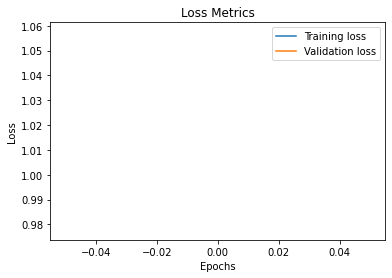

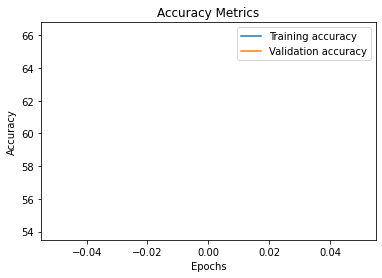

Test Metrics (wo augmentation): 



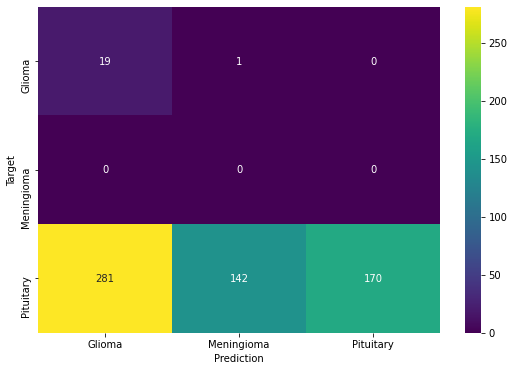


Accuracy Score: 0.3083

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.06      0.95      0.12        20
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.29      0.45       593

    accuracy                           0.31       613
   macro avg       0.35      0.41      0.19       613
weighted avg       0.97      0.31      0.43       613


Precision Score (Class-Wise): 
[0.06333333 0.         1.        ]
Average Precision Score: 0.3544444444444444

Recall Score (Class-Wise): 
[0.95       0.         0.28667791]
Average Recall Score: 0.4122259696458685

F1 Score (Class-Wise): 
[0.11875    0.         0.44560944]
Average F1: 0.1881198121450415



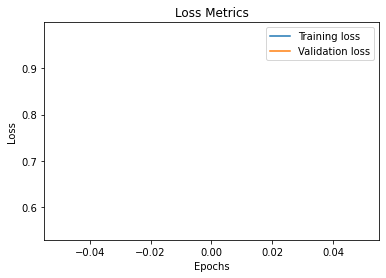

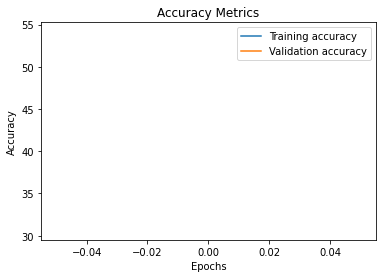

Finished Training

Training Duration 3.75 minutes
GPU memory used : 1991784960 kb
GPU memory cached : 7038042112 kb

FOLD 2


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.106580  Accuracy: 34.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.782596  Accuracy: 45.819805%
Epoch:  1  batch:    307 [   307/613]  Loss: 1.083879  Accuracy: 44.462541%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.973134  Accuracy: 45.000000%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.884015  Accuracy: 44.417822%
Epoch 1 | Training Accuracy: 44.417824% | Training Loss: 0.884015
Test accuracy: 56.615261% | Test Loss: 0.890964
Test accuracy (wo augmentation): 28.733767% | Test Loss: 1.001535
Test Metrics: 



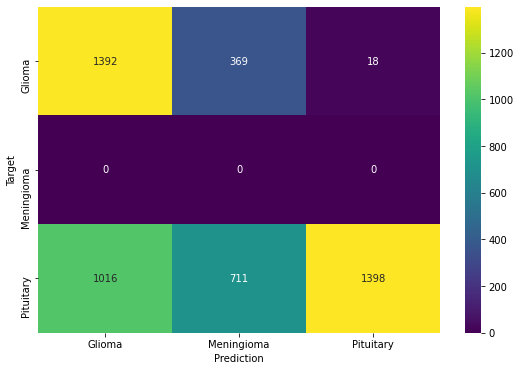


Accuracy Score: 0.5689

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.58      0.78      0.66      1779
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.45      0.62      3125

    accuracy                           0.57      4904
   macro avg       0.52      0.41      0.43      4904
weighted avg       0.84      0.57      0.63      4904


Precision Score (Class-Wise): 
[0.57807309 0.         0.98728814]
Average Precision Score: 0.5217870750980723

Recall Score (Class-Wise): 
[0.78246206 0.         0.44736   ]
Average Recall Score: 0.40994068577852727

F1 Score (Class-Wise): 
[0.66491521 0.         0.61572341]
Average F1: 0.4268795408992095



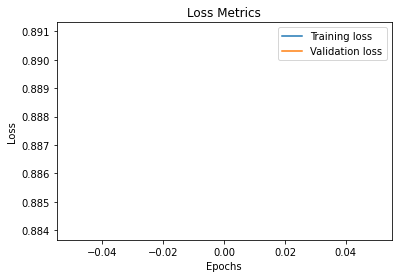

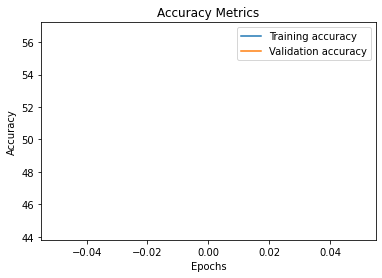

Test Metrics (wo augmentation): 



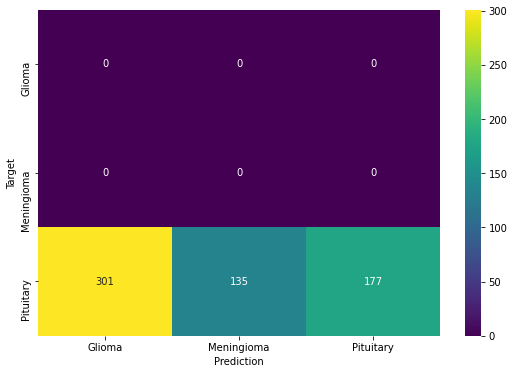


Accuracy Score: 0.2887

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.29      0.45       613

    accuracy                           0.29       613
   macro avg       0.33      0.10      0.15       613
weighted avg       1.00      0.29      0.45       613


Precision Score (Class-Wise): 
[0. 0. 1.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.         0.         0.28874388]
Average Recall Score: 0.09624796084828711

F1 Score (Class-Wise): 
[0.         0.         0.44810127]
Average F1: 0.14936708860759493



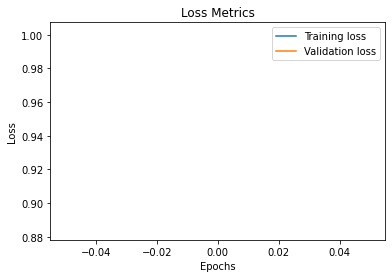

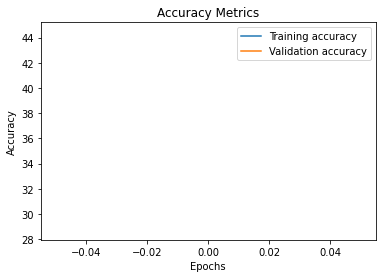

Finished Training

Training Duration 3.76 minutes
GPU memory used : 1992112640 kb
GPU memory cached : 7038042112 kb

FOLD 3


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.115244  Accuracy: 25.000000%
Epoch:  1  batch:    154 [   154/613]  Loss: 0.999970  Accuracy: 44.379058%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.630751  Accuracy: 48.269544%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.901999  Accuracy: 51.331522%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.634379  Accuracy: 52.635604%
Epoch 1 | Training Accuracy: 52.635605% | Training Loss: 0.634379
Test accuracy: 64.163963% | Test Loss: 0.710318
Test accuracy (wo augmentation): 32.954544% | Test Loss: 1.290779
Test Metrics: 



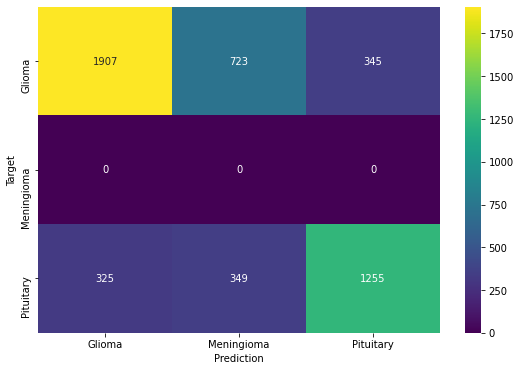


Accuracy Score: 0.6448

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.85      0.64      0.73      2975
         1.0       0.00      0.00      0.00         0
         2.0       0.78      0.65      0.71      1929

    accuracy                           0.64      4904
   macro avg       0.55      0.43      0.48      4904
weighted avg       0.83      0.64      0.72      4904


Precision Score (Class-Wise): 
[0.85439068 0.         0.784375  ]
Average Precision Score: 0.5462552270011948

Recall Score (Class-Wise): 
[0.6410084  0.         0.65059616]
Average Recall Score: 0.4305348557255977

F1 Score (Class-Wise): 
[0.73247551 0.         0.71124965]
Average F1: 0.4812417198411749



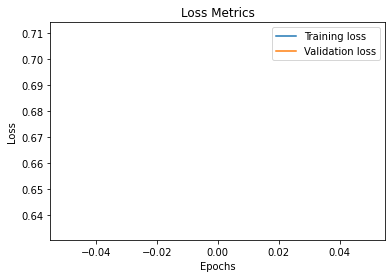

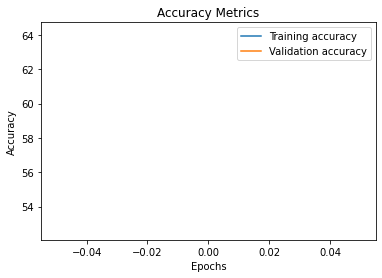

Test Metrics (wo augmentation): 



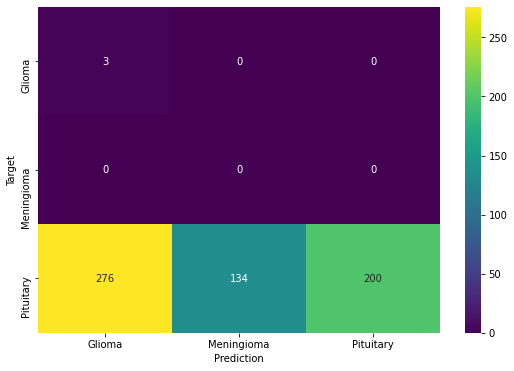


Accuracy Score: 0.3312

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.01      1.00      0.02         3
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.33      0.49       610

    accuracy                           0.33       613
   macro avg       0.34      0.44      0.17       613
weighted avg       1.00      0.33      0.49       613


Precision Score (Class-Wise): 
[0.01075269 0.         1.        ]
Average Precision Score: 0.33691756272401435

Recall Score (Class-Wise): 
[1.         0.         0.32786885]
Average Recall Score: 0.4426229508196721

F1 Score (Class-Wise): 
[0.0212766  0.         0.49382716]
Average F1: 0.17170125207950268



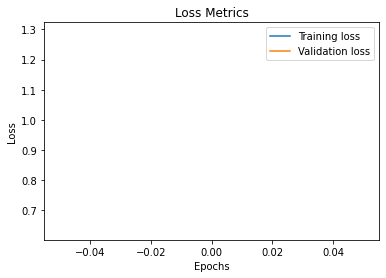

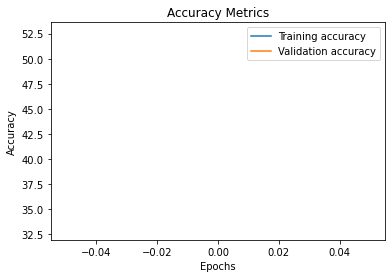

Finished Training

Training Duration 3.74 minutes
GPU memory used : 1991784960 kb
GPU memory cached : 7038042112 kb

FOLD 4


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.097749  Accuracy: 34.375000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.282741  Accuracy: 43.019481%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.638382  Accuracy: 47.628257%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.645845  Accuracy: 51.297554%
Epoch:  1  batch:    613 [   613/613]  Loss: 0.794869  Accuracy: 52.324633%
Epoch 1 | Training Accuracy: 52.324635% | Training Loss: 0.794869
Test accuracy: 60.856331% | Test Loss: 0.710818
Test accuracy (wo augmentation): 33.116882% | Test Loss: 1.145553
Test Metrics: 



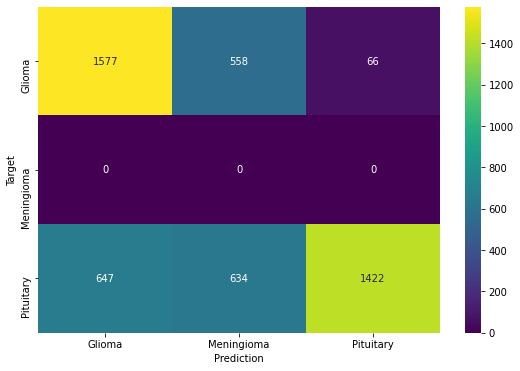


Accuracy Score: 0.6115

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71      2201
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.53      0.68      2703

    accuracy                           0.61      4904
   macro avg       0.55      0.41      0.46      4904
weighted avg       0.84      0.61      0.69      4904


Precision Score (Class-Wise): 
[0.70908273 0.         0.95564516]
Average Precision Score: 0.5549092983677574

Recall Score (Class-Wise): 
[0.7164925  0.         0.52608213]
Average Recall Score: 0.4141915447910452

F1 Score (Class-Wise): 
[0.71276836 0.         0.67859699]
Average F1: 0.46378845171318145



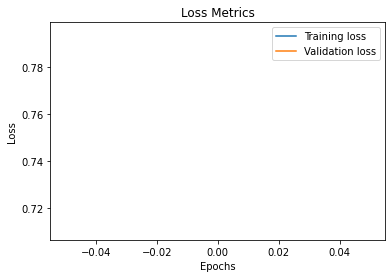

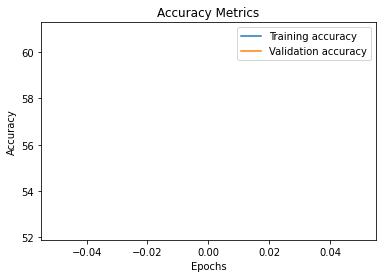

Test Metrics (wo augmentation): 



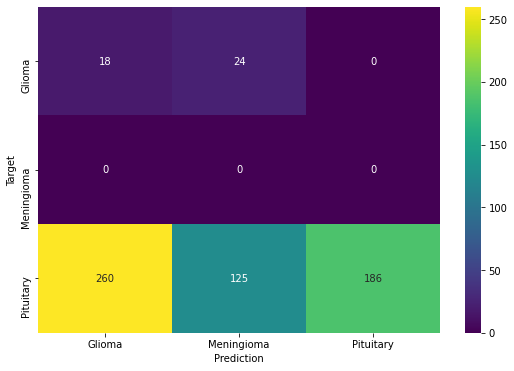


Accuracy Score: 0.3328

Classification Report: 

              precision    recall  f1-score   support

         0.0       0.06      0.43      0.11        42
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.33      0.49       571

    accuracy                           0.33       613
   macro avg       0.35      0.25      0.20       613
weighted avg       0.94      0.33      0.47       613


Precision Score (Class-Wise): 
[0.0647482 0.        1.       ]
Average Precision Score: 0.354916067146283

Recall Score (Class-Wise): 
[0.42857143 0.         0.32574431]
Average Recall Score: 0.25143857893420063

F1 Score (Class-Wise): 
[0.1125     0.         0.49141347]
Average F1: 0.20130449141347426



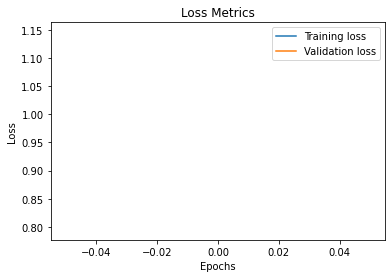

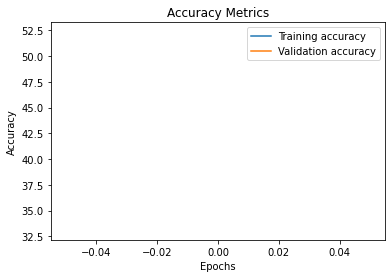

Finished Training

Training Duration 3.81 minutes
GPU memory used : 1991784960 kb
GPU memory cached : 7038042112 kb

FOLD 5


Training the model
Epoch:  1  batch:      1 [     1/613]  Loss: 1.038513  Accuracy: 65.625000%
Epoch:  1  batch:    154 [   154/613]  Loss: 1.151093  Accuracy: 43.242695%
Epoch:  1  batch:    307 [   307/613]  Loss: 0.855719  Accuracy: 45.846906%
Epoch:  1  batch:    460 [   460/613]  Loss: 0.998305  Accuracy: 44.904891%
Epoch:  1  batch:    613 [   613/613]  Loss: 1.048177  Accuracy: 45.931892%
Epoch 1 | Training Accuracy: 45.931892% | Training Loss: 1.048177
Test accuracy: 43.790848% | Test Loss: 1.251010
Test accuracy (wo augmentation): 43.790848% | Test Loss: 1.149045
Test Metrics: 



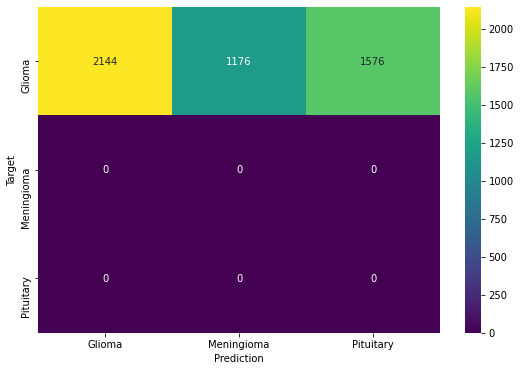


Accuracy Score: 0.4379

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61      4896
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.44      4896
   macro avg       0.33      0.15      0.20      4896
weighted avg       1.00      0.44      0.61      4896


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.4379085 0.        0.       ]
Average Recall Score: 0.14596949891067537

F1 Score (Class-Wise): 
[0.60909091 0.         0.        ]
Average F1: 0.20303030303030303



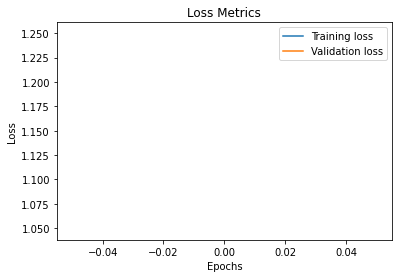

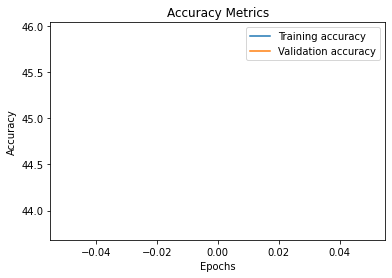

Test Metrics (wo augmentation): 



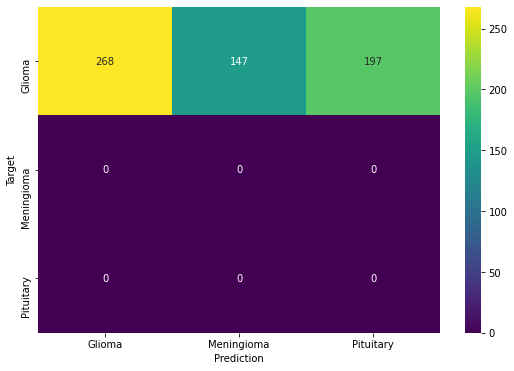


Accuracy Score: 0.4379

Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61       612
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.44       612
   macro avg       0.33      0.15      0.20       612
weighted avg       1.00      0.44      0.61       612


Precision Score (Class-Wise): 
[1. 0. 0.]
Average Precision Score: 0.3333333333333333

Recall Score (Class-Wise): 
[0.4379085 0.        0.       ]
Average Recall Score: 0.14596949891067537

F1 Score (Class-Wise): 
[0.60909091 0.         0.        ]
Average F1: 0.20303030303030303



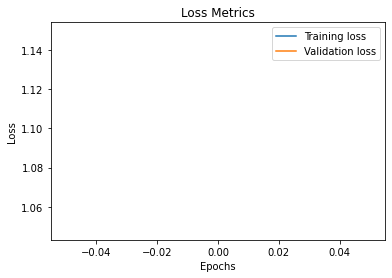

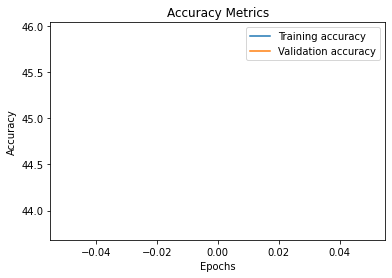

Finished Training

Training Duration 3.74 minutes
GPU memory used : 1999190528 kb
GPU memory cached : 7038042112 kb



In [12]:
batch_size = 4 # generates 7 new images + original image - per image, 4 * 8 = 32 images per batch

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    # Print
    print(f'FOLD {fold+1}\n')
    
    model_name = f'vgg16_frozen_w_aug_fold_{fold+1}' 
    
    # Sample elements randomly from a given list of ids, no replacement.
    train_subsampler = torch.utils.data.SubsetRandomSampler(train_ids)
    test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
    
    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      dataset, 
                      batch_size=batch_size, sampler=train_subsampler, collate_fn=augmentor)

    testloader = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=augmentor)
    
    testloader_plain = torch.utils.data.DataLoader(
                      dataset,
                      batch_size=batch_size, sampler=test_subsampler, collate_fn=plain_transform)
    
    model = vgg16()

    for params in model.parameters():
        params.requires_grad = False

    model.classifier[6] = nn.Linear(4096, 3)
    
    for params in model.classifier.parameters():
        params.requires_grad = True
    
    model = model.to(device)
        
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    print('\nTraining the model')
    b, test_b = 0, 0

    training_losses = []
    training_accuracies = []
    test_loss = []
    test_corr = []
    test_corr_a = []
    test_loss_a = []

    start_time = time.time()

    for epoch in range(epochs):
        e_start = time.time()

        model.train()

        running_loss = 0.0
        running_accuracy = 0.0
        tst_corr = 0.0

        for b, (X_train, y_train) in enumerate(trainloader):
            X_train, y_train = X_train.to(device), y_train.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            y_pred = model(X_train)
            
            y_pred = y_pred.view(-1, n_classes)
            
            loss = criterion(y_pred, y_train)

            predicted = torch.argmax(y_pred.data, dim=1).data
            batch_corr = (predicted == y_train).sum()
            running_accuracy += batch_corr
            
            loss.backward()
            
            optimizer.step()
            
            # print statistics
            running_loss += loss.item()

            if b % int(len(trainloader)/batch_size) == 0:
                print(f'Epoch: {epoch+1:2}  batch: {b+1:6} [{b+1:6}/{len(trainloader)}]  Loss: {loss.item():.6f}  Accuracy: {running_accuracy.item()*100/((batch_size * 8) * (b+1)):.6f}%')
            
        training_losses.append(loss.item())
        training_accuracies.append(running_accuracy.item()*100/((batch_size * 8) * (b+1)))

        print(f"Epoch {epoch+1} | Training Accuracy: {torch.mean(torch.tensor(training_accuracies)):.6f}% | Training Loss: {torch.mean(torch.tensor(training_losses)):.6f}")

        model.eval()
        b = 0

        with torch.no_grad():
            correct = 0
            labels = []
            pred = []

            new_y = 0.0

            # perform test set evaluation batch wise
            for b, (X, y) in enumerate(testloader):
                b += 1
                # set label to use CUDA if available
                X, y = X.to(device), y.to(device)
   
                labels.extend(y.view(-1).cpu().numpy())

                # perform forward pass
                y_val = model(X).view(-1, n_classes)

                # get argmax of predicted values, which is our label
                predicted = torch.argmax(y_val.data, dim=1).view(-1)

                # append predicted label
                pred.extend(predicted.cpu().numpy())

                # calculate loss
                loss = criterion(y_val, y)

                # increment correct with correcly predicted labels per batch
                correct += (predicted == y).sum()

            # append correct samples labels and losses
            test_corr.append(correct.item()*100/(batch_size * 8 * b))
            
            test_loss.append(loss.item())
                
        print(f"Test accuracy: {torch.mean(torch.tensor(test_corr)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss)):.6f}")

        labels = torch.Tensor(labels)
        pred = torch.Tensor(pred)

        with torch.no_grad():
          correct = 0
          labels_a = []
          pred_a = []

          new_y = 0.0

          # perform test set evaluation batch wise
          for b, (X, y) in enumerate(testloader_plain):
              b += 1
              # set label to use CUDA if available
              X, y = X.to(device), y.to(device)

              labels_a.extend(y.view(-1).cpu().numpy())

              # perform forward pass
              y_val = model(X).view(-1, n_classes)

              # get argmax of predicted values, which is our label
              predicted = torch.argmax(y_val.data, dim=1).view(-1)

              # append predicted label
              pred_a.extend(predicted.cpu().numpy())

              # calculate loss
              loss = criterion(y_val, y)

              # increment correct with correcly predicted labels per batch
              correct += (predicted == y).sum()

          # append correct samples labels and losses
          test_corr_a.append(correct.item()*100/(batch_size * b))

          test_loss_a.append(loss.item())

        labels_a = torch.Tensor(labels_a)
        pred_a = torch.Tensor(pred_a)

        print(f"Test accuracy (wo augmentation): {torch.mean(torch.tensor(test_corr_a)):.6f}% | Test Loss: {torch.mean(torch.tensor(test_loss_a)):.6f}")

    print("Test Metrics: \n")

    plot_confusion_matrix(pred, labels, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred, labels)
    
    values = {'model': model_name, 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss) 
    plot_accuracy(training_accuracies, test_corr)
       
    print("Test Metrics (wo augmentation): \n")

    plot_confusion_matrix(pred_a, labels_a, class_names)

    a, p, p_avg, r, r_avg, f, f_avg = get_all_metrics(pred_a, labels_a)
    
    values = {'model': model_name + '_test_plain', 'accuracy': a, 'loss': torch.mean(torch.tensor(test_loss_a)), 'precision_class_wise': p, 'precision_avg': p_avg, 'recall_class_wise': r, 'recall_avg': r_avg, 'f1_class_wise': f, 'f1_avg': f_avg}
    df = df.append(values, ignore_index = True)

    plot_loss(training_losses, test_loss_a) 
    plot_accuracy(training_accuracies, test_corr_a)
    
    print('Finished Training')

    end_time = time.time() - start_time    

    # print training summary
    print("\nTraining Duration {:.2f} minutes".format(end_time/60))
    print("GPU memory used : {} kb".format(torch.cuda.memory_allocated()))
    print("GPU memory cached : {} kb\n".format(torch.cuda.memory_reserved()))

    torch.save(model.state_dict(), model_dir + '/' + model_name + f'_fold_{fold}.pt')
    df.to_csv('vgg16_test_results.csv', index=False)